In [9]:
import prep
import prsa
import article
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df = prep.read_data("data/normokapnia/Ochotnik01_baseline.csv", 'abp_finger[mm_Hg]')
df.head()

,TimeSteps,Values
0,0,103.5
1,1,103.0
2,2,105.0
3,3,106.4
4,4,106.4


In [11]:
# take only first 900 points
df = df.iloc[:6500]
df.interpolate(inplace=True)

Text(0, 0.5, 'abp[mmHg]')

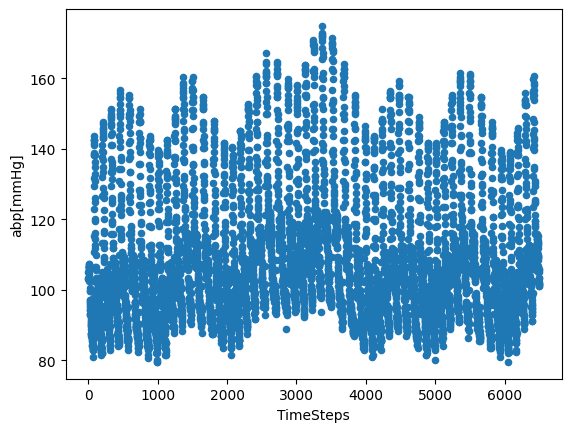

In [12]:
# make scatter plot, and change y_axis name to 'abp[mmHg]'
df.plot.scatter(x='TimeSteps', y='Values')
plt.ylabel('abp[mmHg]')

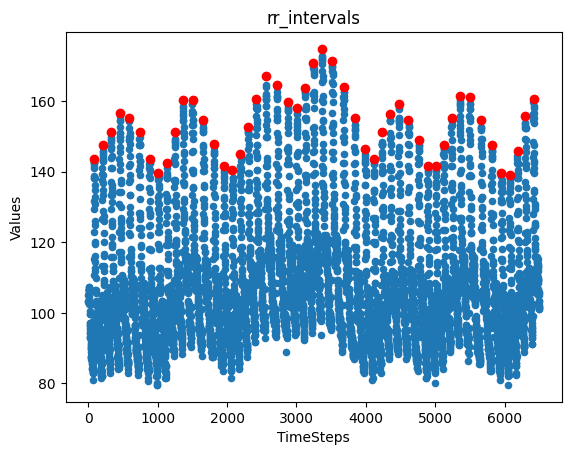

In [13]:
rr_signal_dict = article.get_rr_intervals_with_time(df, 0.8, 110, True, 'rr_intervals')

In [14]:
# make np.array from all rr_intervals_dict values
rr_intervals_v = np.array(list(rr_signal_dict.values()))

In [15]:
prsa_signal, anchor_points = article.calculate(rr_intervals_v, 3, 'AC')

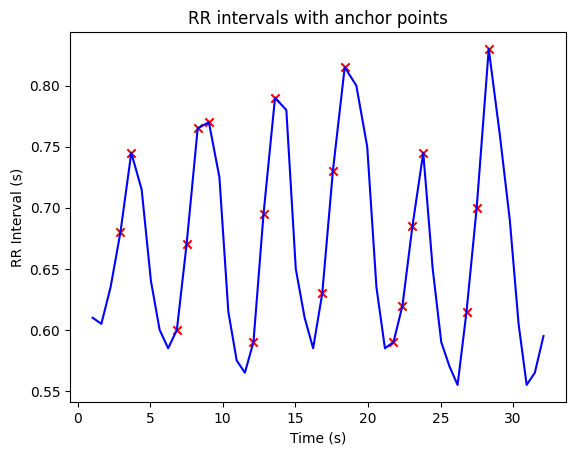

In [16]:
article.plot_with_anchors(rr_signal_dict, anchor_points, 3)